# Cadre

In [4]:
import numpy as np
from matplotlib import pyplot as plt

np.__version__

'1.23.2'

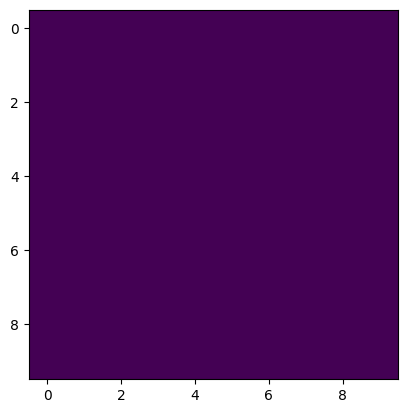

In [33]:
square = np.ones((10, 10))
plt.imshow(square);

In [45]:
def cadre(tab, inplace=True): 
    n, p = np.shape(tab)
    if inplace:
        tab2 = tab
    else:
        tab2 = tab.copy()
    tab2[:, 1] = 0
    tab2[1, :] = 0
    tab2[:, p-2] = 0
    tab2[n-2, :] = 0
    return tab2

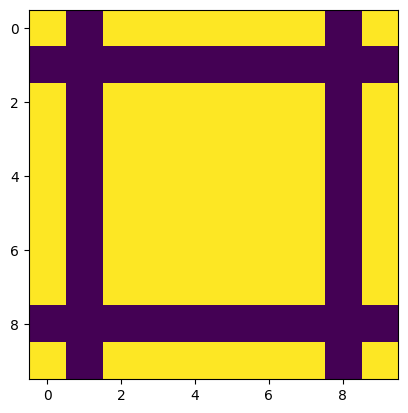

In [46]:
plt.imshow(cadre(square, inplace=False));

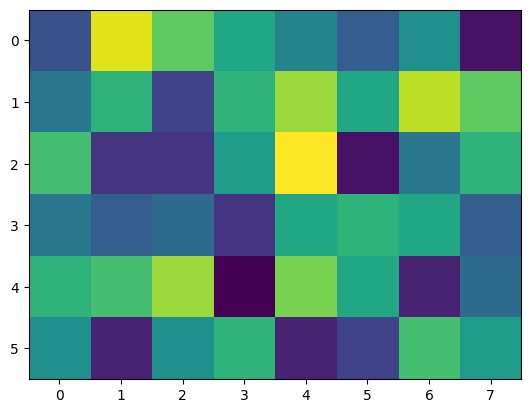

In [51]:
tabl = np.random.randint(0, 21, (6, 8), dtype='uint8')
plt.imshow(tabl);

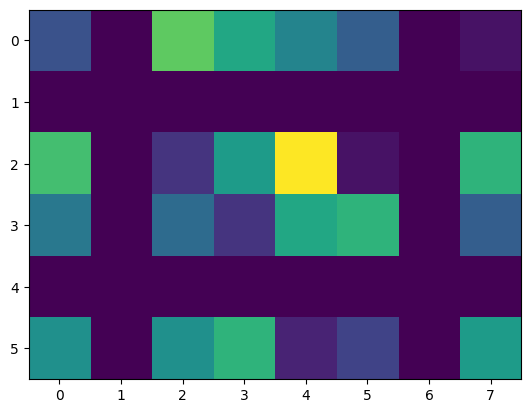

In [52]:
plt.imshow(cadre(tabl, inplace=False));

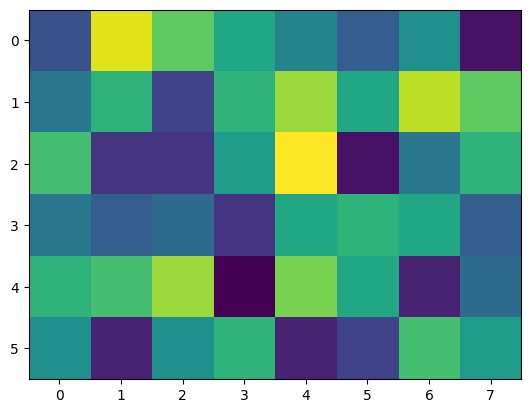

In [54]:
plt.imshow(tabl);

On voit que **cadre** marche bien, même si le tableau n'est pas un carré. En mettant l'argument **inplace=False**, le tableau d'origine n'est pas modifié. 

# Cadre2

Cette fois, on en peut plus faire les modifications en place, car on modifie les dimensions du tableau. 

In [56]:
def cadre2(tab):
    n, p = tab.shape
    tab2 = np.zeros((n+2, p+2)) # on rajoute deux lignes et deux colonnes. 
    tab2[1:n+1, 1:p+1] = tab
    return tab2

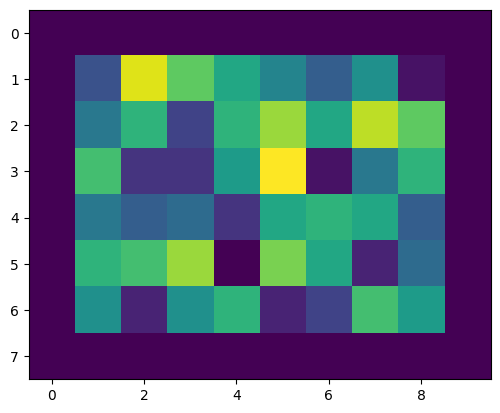

In [57]:
plt.imshow(cadre2(tabl));

La fonction marche bien sur cet exemple. 

# Anti_diagonal

## Premier programme

In [5]:
def anti_diagonal(L, type='float64'): # L désigne une liste de nombres. 
    n = len(L)
    tab = np.zeros((n, n), dtype=type)
    for i in range(n):
        tab[n-i-1, i] = L[-i-1]
    return tab

In [6]:
anti_diagonal([1, 2, 3, 4])

array([[0., 0., 0., 1.],
       [0., 0., 2., 0.],
       [0., 3., 0., 0.],
       [4., 0., 0., 0.]])

In [7]:
anti_diagonal([1, 2, 3, 4], type='uint8')

array([[0, 0, 0, 1],
       [0, 0, 2, 0],
       [0, 3, 0, 0],
       [4, 0, 0, 0]], dtype=uint8)

In [63]:
anti_diagonal([1])

array([[1.]])

In [64]:
anti_diagonal([1, 2])

array([[0., 1.],
       [2., 0.]])

## Deuxième programme

Avec **np.empty**, le tableau n'est pas initialisé (contrairement à **np.ones** et **np.zeros** où on place des 1 ou des 0). Il faut donc rajouter des zéros. 

In [32]:
def anti_diagonal_2(L, type='float64'): 
    n = len(L)
    tab = np.empty((n, n), dtype=type)
    for i in range(n):
        tab[n-i-1, i] = L[-i-1]
        tab[i, :n-i-1] = 0
        if i >= 1:
            tab[i, n-i] = 0
    return tab

In [9]:
anti_diagonal_2([1, 2, 3, 4])

array([[0., 0., 0., 1.],
       [0., 0., 2., 0.],
       [0., 3., 0., 0.],
       [4., 0., 0., 0.]])

In [10]:
anti_diagonal_2([1, 2, 3, 4], type='uint8')

array([[0, 0, 0, 1],
       [0, 0, 2, 0],
       [0, 3, 0, 0],
       [4, 0, 0, 0]], dtype=uint8)

In [11]:
anti_diagonal_2([1])

array([[1.]])

In [12]:
anti_diagonal_2([1, 2])

array([[0., 1.],
       [2., 0.]])

Si on **change la nature** de l'argument : 

In [13]:
anti_diagonal_2((1, 2))

array([[0., 1.],
       [2., 0.]])

In [29]:
dictionnaire = {1: 3, 2: 4}

In [30]:
anti_diagonal_2(dictionnaire)

KeyError: -1

In [17]:
anti_diagonal_2(range(1,3))

array([[0., 1.],
       [2., 0.]])

In [21]:
anti_diagonal_2(range(4), type=np.int16)

array([[0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 2, 0, 0],
       [3, 0, 0, 0]], dtype=int16)

Les tuples et les *range* marchent, mais pas les dictionnaires.

## Troisième programme

Le problème est que le programme ne marche pas dans le cas suivant : 

In [38]:
anti_diagonal_2(x**2 for x in range(4))

TypeError: object of type 'generator' has no len()

En fait, l'instruction suivante ne retourne pas un tuple : 

In [39]:
(x**2 for x in range(4))

<generator object <genexpr> at 0x1297727b0>

Pour résoudre le problème, on place tous les éléments de l'argument dans une liste.

In [40]:
def anti_diagonal_3(L, type='float64'): 
    M = []
    for elem in L:
        M.append(elem)
    n = len(M)
    tab = np.empty((n, n), dtype=type)
    for i in range(n):
        tab[n-i-1, i] = M[-i-1]
        tab[i, :n-i-1] = 0
        if i >= 1:
            tab[i, n-i] = 0
    return tab

In [44]:
anti_diagonal_3(x**2 for x in range(4))

array([[0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 4., 0., 0.],
       [9., 0., 0., 0.]])